In [6]:
%load_ext autoreload
%autoreload 2
import os
import torch
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
import numpy as np

# ensure is in parent directory
try:
    print(os.getcwd())
    os.chdir("../../rug-hr/")
    print(os.getcwd())
except:
    pass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
c:\Users\mo\Documents\Organisations\RUG\rug-hr


c:\Users\mo\anaconda3\envs\handrec\lib\site-packages\monai\utils\deprecate_utils.py:321: FutureWarning: monai.transforms.io.dictionary LoadImaged.__init__:image_only: Current default value of argument `image_only=False` has been deprecated since version 1.1. It will be changed to `image_only=True` in version 1.3.
  warn_deprecated(argname, msg, warning_category)


Loaded images from directory: ./assets/scripture_prototypes/.
Loaded images from directory: ./assets/scripture_corruption_prototypes/.
using device cuda
(1788, 1337)


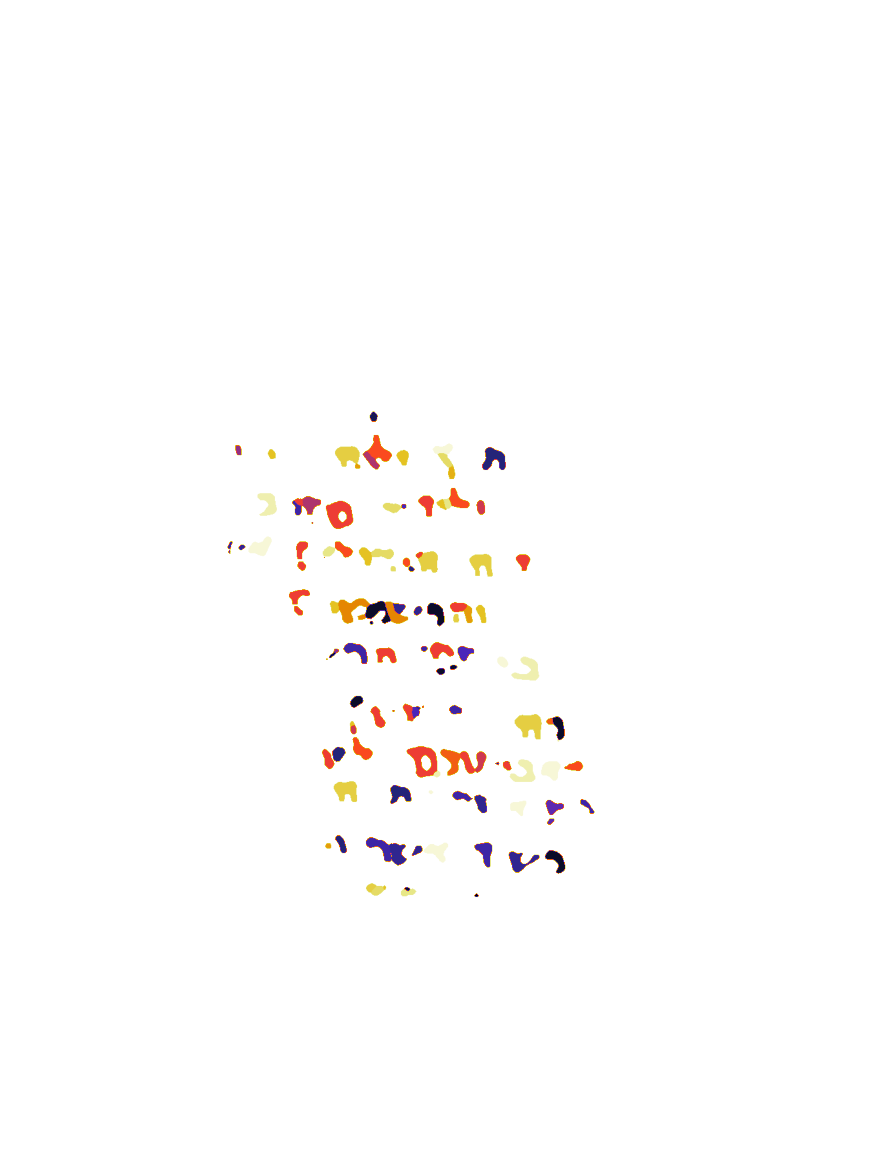

(1788, 1337) 25 labels are present
ך
עוהחסלואדזות
ברמסמדמוגלנ
אמגלודלגתמההמ
מ
מוטםטששםמחו
מט
רממקאב
ם
ם
ונממקשרהכם
ב
מתלמבכמנמפבאל
התרשאצר
תרששארשם
הדוםג


In [7]:
from modules.dss import SegLMDSS
from modules.dss.postprocessing import transcribe_image
from modules.scripturize.utils.plot import show_labelled_manuscript

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"using device {device}")

model = SegLMDSS().to(device)
# model.load("./artifacts/hebrew_unetr.pt")
model.load("./models/seglm-v1-256x256-dss.pt")
sample_paths = glob("./datasets/image-data/*binarized*")
# sample_path = "./datasets/image-data/P106-Fg002-R-C01-R01-binarized.jpg"
# sample_path = "./datasets/image-data/P168-Fg016-R-C01-R01-binarized.jpg"
# sample_path = "./datasets/dss_corrupted/Mutated/manu_1.png"
sample_path = np.random.choice(sample_paths)

predictions = model.predict(im_path=sample_path)
print(predictions.shape)

np.save("output.npy", predictions)

show_labelled_manuscript(predictions, interactive=False, random_crop_size=False)
plt.show()

transcription = transcribe_image(predictions)
print(transcription)
Image.fromarray(predictions.astype(np.int16)).save(
    f"./datasets/outputs/{np.random.randint(0, 1000)}.png")